## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
#count all the rows original in data
rowsn=study_results.count
print(rowsn)

<bound method DataFrame.count of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]>


In [3]:
# # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRowsDF = study_results[study_results.duplicated(['Mouse ID','Timepoint'])]
print("Duplicate Rows :", duplicateRowsDF, sep='\n')

Duplicate Rows :
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
137      g989          0           45.000000                 0
360      g989          5           47.570392                 0
681      g989         10           49.880528                 0
869      g989         15           53.442020                 0
1111     g989         20           54.657650                 1


In [4]:
#cleaning repeated rows in the data
study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# 5 rows were duplicates in both Mouse ID and Timepoint and were deleted from memory

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

study_resultsnew=(study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint']))

In [6]:
# Checking the number of mice in the clean DataFrame.
count=study_resultsnew['Mouse ID'].count
print(count)

<bound method Series.count of 0       b128
1       f932
2       g107
3       a457
4       c819
        ... 
1888    r944
1889    u364
1890    p438
1891    x773
1892    b879
Name: Mouse ID, Length: 1888, dtype: object>


In [7]:
# Combine the data into a single dataset
MouseData=mouse_metadata.merge(study_resultsnew, how='inner', on='Mouse ID', left_index=False, sort=True)


In [8]:
# Display the data table for preview
MouseData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [9]:
# drop the Na values and check that all indexes are correct to have an accurate count
TumorVolume_df=MouseData.dropna(subset=['Tumor Volume (mm3)'])
TumorVolume_list=TumorVolume_df['Tumor Volume (mm3)']
TumorVolume_list.reset_index(drop=True,inplace=True)


In [10]:
#calculate mean
TVmean=TumorVolume_list.mean()
TVmean

50.449276454131414

In [11]:
#calculate median
TVmedian=TumorVolume_list.median()
TVmedian

48.951421075

In [12]:
#calculate the sum and count first
TVsum=TumorVolume_list.sum()
TVsum
TVcount=TumorVolume_list.count()
TVcount, TVsum, TVsum/TVcount

(1888, 95248.2339454, 50.44927645413136)

In [13]:
#calculating variance with old fashion method to secure that all elements are fine
Myelement=0
sumMyelementvariance=0
for i in range(TVcount-1):
    Myelementvariance=(float(TumorVolume_list[i])-TVmean)**2
    sumMyelementvariance= sumMyelementvariance + Myelementvariance
    
TVvariance=sumMyelementvariance/TVcount
TVvariance

78.95879831248787

In [14]:
#calculates standard deviation using scipy
TVstd=st.stats.tstd(TumorVolume_list, axis=0, ddof=1)

In [15]:
#calculates sem using scipy
TVsem=st.stats.sem(TumorVolume_list,axis=0, ddof=1)

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 

TotalTumorVolumestats=pd.DataFrame.from_dict({'index':'Tumor Volume','Count':[TVcount],'Mean':[TVmean],'Median':[TVmedian],'Variance':[TVvariance],
                                    'Stand deviation':TVstd,'SEM':[TVsem]})
TotalTumorVolumestats.style.hide_index()


index,Count,Mean,Median,Variance,Stand deviation,SEM
Tumor Volume,1888,50.449276,48.951421,78.958798,8.904565,0.204933


In [17]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [18]:
TumorVolume_df
TumorVolume_df=MouseData.dropna(subset=['Tumor Volume (mm3)'])
TumorVolume_df=MouseData.dropna(subset=['Drug Regimen'])
TumorVolume_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

TumorRegimeVolume_df=TumorVolume_df[['Drug Regimen','Tumor Volume (mm3)']]
TumorRegimeVolume_df

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,45.000000
1,Infubinol,48.508468
2,Infubinol,51.852437
3,Infubinol,52.777870
4,Infubinol,55.173336
...,...,...
1883,Naftisol,63.145652
1884,Naftisol,65.841013
1885,Naftisol,69.176246
1886,Naftisol,70.314904


In [20]:
# Using the aggregation method, produce the same summary statistics in a single line

In [21]:
TVstatsRegime=pd.DataFrame(TumorRegimeVolume_df.groupby(['Drug Regimen']).agg(['count','mean','median','var','std','sem'])).reset_index()
TVstatsRegime.style.hide_index()

## Bar and Pie Charts

In [22]:
#let's check the column names with enumerate
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(TVstatsRegime.columns)]
col_mapping

["0:('Drug Regimen', '')",
 "1:('Tumor Volume (mm3)', 'count')",
 "2:('Tumor Volume (mm3)', 'mean')",
 "3:('Tumor Volume (mm3)', 'median')",
 "4:('Tumor Volume (mm3)', 'var')",
 "5:('Tumor Volume (mm3)', 'std')",
 "6:('Tumor Volume (mm3)', 'sem')"]

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

TVstatsRegime=TVstatsRegime.loc[:,[('Drug Regimen', ''),('Tumor Volume (mm3)', 'count')]]
TVstatsRegime

,Drug Regimen,Tumor Volume (mm3)
,,count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181


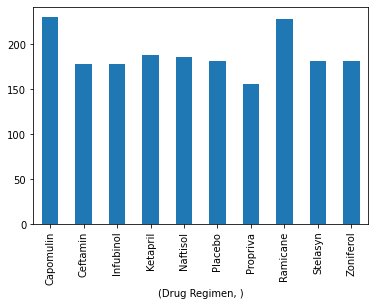

In [24]:
#Tumor Volume measurements per Regimen barplot
TVstatsRegime.plot(kind='bar', x=('Drug Regimen', ''), y=('Tumor Volume (mm3)', 'count'), rot=90, legend=False)

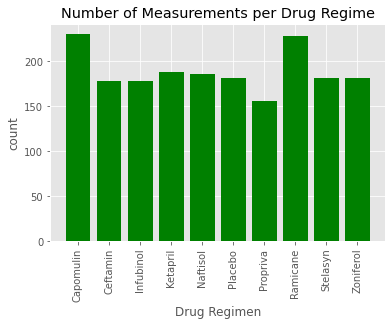

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
%matplotlib inline
plt.style.use('ggplot')

x = TVstatsRegime[('Drug Regimen', '')]
count = TVstatsRegime[('Tumor Volume (mm3)', 'count')]

plt.bar(x, count, color='green')
plt.xlabel("Drug Regimen")
plt.ylabel("count")
plt.title("Number of Measurements per Drug Regime")

plt.xticks(x, rotation=90)

plt.show()

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
MouseData


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex_df=MouseData.groupby(['Sex']).count()
Sex_df['Mouse ID']

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

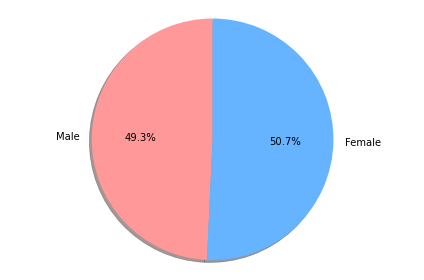

In [28]:
labels = ['Male', 'Female']
sizes = [Sex_df['Mouse ID'][0],Sex_df['Mouse ID'][1]]

#add colors
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
Regimen_df=MouseData.set_index('Drug Regimen')
Regimen_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,Female,20,23,0,45.000000,0
Infubinol,a203,Female,20,23,5,48.508468,0
Infubinol,a203,Female,20,23,10,51.852437,1
Infubinol,a203,Female,20,23,15,52.777870,1
Infubinol,a203,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


In [30]:
#Regimen_df=MouseData[['Capomulin']]
Capomulin_df=Regimen_df.loc[['Capomulin']].reset_index()
Ramicane_df=Regimen_df.loc[['Ramicane']].reset_index()
Infubinol_df=Regimen_df.loc[['Infubinol']].reset_index() 
Ceftamin_df=Regimen_df.loc[['Ceftamin']].reset_index()


In [31]:
# Start by getting the last (greatest) timepoint for each mouse

c_to_keep=['Drug Regimen','Mouse ID','Tumor Volume (mm3)']
Capomulin=Capomulin_df.drop_duplicates(subset=['Mouse ID'], keep='last', inplace=False, ignore_index=False).reset_index()
Capomulin

,index,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,Capomulin,b128,Female,9,22,45,38.982878,2
1,19,Capomulin,b742,Male,7,21,45,38.939633,0
2,24,Capomulin,f966,Male,16,17,20,30.485985,0
3,34,Capomulin,g288,Male,3,19,45,37.074024,1
4,44,Capomulin,g316,Female,22,22,45,40.159220,2
5,54,Capomulin,i557,Female,1,24,45,47.685963,1
6,64,Capomulin,i738,Female,23,20,45,37.311846,2
7,74,Capomulin,j119,Female,7,23,45,38.125164,1
8,82,Capomulin,j246,Female,21,21,35,38.753265,1
9,92,Capomulin,l509,Male,17,21,45,41.483008,3


In [32]:
Ramicane=Ramicane_df.drop_duplicates(subset=['Mouse ID'], keep='last', inplace=False, ignore_index=False)
Infubinol=Infubinol_df.drop_duplicates(subset=['Mouse ID'], keep='last', inplace=False, ignore_index=False)
Ceftamin=Ceftamin_df.drop_duplicates(subset=['Mouse ID'], keep='last', inplace=False, ignore_index=False)

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin=Capomulin.loc[:,c_to_keep]
Ramicane=Ramicane.loc[:,c_to_keep]
Infubinol=Infubinol.loc[:,c_to_keep]
Ceftamin=Ceftamin.loc[:,c_to_keep]
Capomulin

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
5,Capomulin,i557,47.685963
6,Capomulin,i738,37.311846
7,Capomulin,j119,38.125164
8,Capomulin,j246,38.753265
9,Capomulin,l509,41.483008


In [34]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Selected = [Capomulin, Ramicane, Infubinol,Ceftamin]
TumorVolume_Selected = pd.concat(Selected)

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

In [35]:
TumorVolume_Selected.set_index('Mouse ID')

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
b128,Capomulin,38.982878
b742,Capomulin,38.939633
f966,Capomulin,30.485985
g288,Capomulin,37.074024
g316,Capomulin,40.159220
...,...,...
x226,Ceftamin,45.000000
x581,Ceftamin,64.634949
x822,Ceftamin,61.386660


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
TumorVolume_Selected.reset_index(drop=True)
df=TumorVolume_Selected
df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
137,Ceftamin,x226,45.000000
147,Ceftamin,x581,64.634949
157,Ceftamin,x822,61.386660
167,Ceftamin,y769,68.594745


In [37]:
Treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

In [38]:
# Create empty list to fill with tumor vol data (for plotting)
TumorVolume=[]

In [39]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [40]:
start=0
end=0
    
for i in range(4):
    Treatment=Treatments[i]
    start=i*25
    end=i+(i+1)*25
    b=df.iloc[start:end,2]
    
    for j in range(25):
        a=b.iloc[j]
        lower=b.mean()-1.5*(b.quantile(0.75)-b.quantile(0.25))
        upper=b.mean()+1.5*(b.quantile(0.75)-b.quantile(0.25))
        #print(j)
        if a<lower or a>upper:
            print(f'POSSIBLE outlier in {Treatment} row {j} ')
        

POSSIBLE outlier in Capomulin row 16 
POSSIBLE outlier in Ramicane row 13 
POSSIBLE outlier in Infubinol row 5 


In [41]:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
